In [163]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Specify relative path to the file
file_path = "../database/CreditCard_CLEANED.csv"

# Load data into a pandas DataFrame
df = pd.read_csv(file_path)


In [164]:
df = df.drop(['Churn Reason'], axis=1)
for col in ['Tenure Months', 'Monthly Charges', 'Total Charges']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [165]:
df["Total Charges"].dropna(inplace=True)

In [166]:
data=df.copy()

In [167]:
for col in ['Tenure Months', 'Monthly Charges', 'Total Charges']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [168]:
# Checking the number of null values in each column
null_counts = data.isnull().sum()
print(null_counts)

# Dropping the rows where at least one element is missing
data = data.dropna()

# Verifying that the null values have been dropped
null_counts_after = data.isnull().sum()
print(null_counts_after)


City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
dtype: int64
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security 

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Definindo as variáveis preditoras e a variável alvo
features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']
X = data[features]
y = data['Churn Value']

# Dividindo os dados em conjunto de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Pré-processamento das variáveis categóricas
categorical_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Criando a pipeline de Regressão Logística
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Treinando o modelo
log_reg_pipeline.fit(X_train, y_train)

# Fazendo previsões
y_pred = log_reg_pipeline.predict(X_test)

# Imprimindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Imprimindo a matriz de confusão
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1044
           1       0.59      0.55      0.57       363

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[909 135]
 [165 198]]


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Defining predictor variables and target variable
features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']
X = data[features]
y = data['Churn Value']

# Splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing for categorical variables
categorical_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical variables
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
numerical_transformer = StandardScaler()

# Complete preprocessor with transformations for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating the Logistic Regression pipeline
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Training the model
log_reg_pipeline.fit(X_train, y_train)

# Making predictions
y_pred = log_reg_pipeline.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Printing the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Extract feature names and coefficients after training
ohe_feature_names = log_reg_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=categorical_features)
num_feature_names = log_reg_pipeline.named_steps['preprocessor'].transformers_[0][2]  # get the names of numerical features
feature_names = np.concatenate([ohe_feature_names, num_feature_names])

coef = log_reg_pipeline.named_steps['classifier'].coef_[0]

# Create a dataframe of the features and their respective coefficients
feature_importance = pd.DataFrame(zip(feature_names, coef), columns=['Feature', 'Coefficient'])

# Calculate the exponent of the coefficients to get the odds ratio
feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])

# Display the dataframe sorted by Odds Ratio
feature_importance = feature_importance.sort_values(by='Odds Ratio', ascending=False)
feature_importance



              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1044
           1       0.60      0.56      0.58       363

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407

[[912 132]
 [161 202]]


,Feature,Coefficient,Odds Ratio
9,Phone Service_Yes,0.792272,2.208409
2,Senior Citizen_No,0.740065,2.096072
37,Paperless Billing_No,0.708840,2.031633
17,Online Security_No internet service,0.514266,1.672410
44,Monthly Charges,0.261134,1.298402
28,Streaming TV_No,0.255708,1.291376
33,Streaming Movies_Yes,0.249993,1.284016
36,Contract_Two year,0.214513,1.239258
19,Online Backup_No,0.203170,1.225280
41,Payment Method_Electronic check,0.202514,1.224477


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Definindo as variáveis preditoras e a variável alvo
features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']
X = data[features]
y = data['Churn Value']

# Dividindo os dados em conjunto de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Pré-processamento das variáveis categóricas
categorical_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Criando a pipeline de Regressão Logística
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Treinando o modelo
log_reg_pipeline.fit(X_train, y_train)

# Fazendo previsões
y_pred = log_reg_pipeline.predict(X_test)

# Imprimindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Imprimindo a matriz de confusão
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1044
           1       0.59      0.55      0.57       363

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[909 135]
 [165 198]]


In [172]:
# Get the feature names after one-hot encoding
ohe = log_reg_pipeline.named_steps['preprocessor'].transformers_[0][1]
feature_names = ohe.get_feature_names_out(input_features=categorical_features)

# Append numerical feature names
numerical_features = list(set(features) - set(categorical_features))
feature_names = np.append(feature_names, numerical_features)

# Get the coefficients from the logistic regression estimator
coef = log_reg_pipeline.named_steps['classifier'].coef_[0]

# Create a dataframe of the features and their respective coefficients
feature_importance = pd.DataFrame(zip(feature_names, coef), columns=['Feature', 'Coefficient'])

# Calculate the exponent of the coefficients to get the odds ratio
feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])

# Display the dataframe sorted by Odds Ratio
feature_importance = feature_importance.sort_values(by='Odds Ratio', ascending=False)

feature_importance

,Feature,Coefficient,Odds Ratio
34,Contract_Month-to-month,1.209573,3.352053
6,Dependents_No,0.775613,2.171923
14,Internet Service_Fiber optic,0.358592,1.431313
41,Payment Method_Electronic check,0.322743,1.380910
16,Online Security_No,0.268718,1.308286
25,Tech Support_No,0.264706,1.303048
19,Online Backup_No,0.212357,1.236589
38,Paperless Billing_Yes,0.177966,1.194784
30,Streaming TV_Yes,0.147351,1.158761
42,Payment Method_Mailed check,0.133823,1.143190


In [173]:
print(feature_importance['Feature']=='Tenure Months')

34    False
6     False
14    False
41    False
16    False
25    False
19    False
38    False
30    False
42    False
22    False
33    False
8     False
11    False
0     False
4     False
3     False
2     False
12    False
5     False
1     False
31    False
10    False
35    False
9     False
24    False
28    False
17    False
32    False
15    False
29    False
26    False
23    False
20    False
21    False
37    False
27    False
39    False
18    False
40    False
13    False
7     False
36    False
Name: Feature, dtype: bool


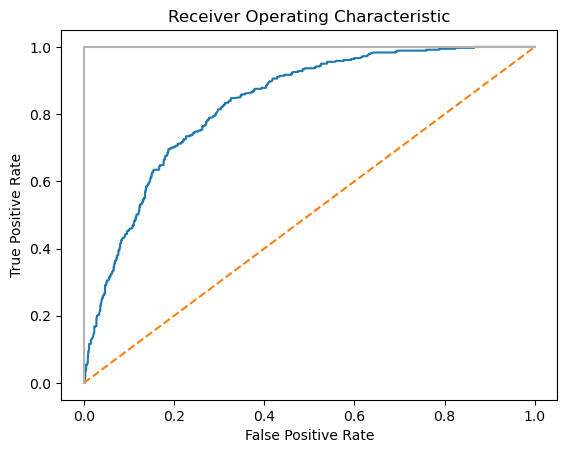

ROC AUC Score: 0.830771182677465


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probability of Y_test records being = 1
Y_test_probability_1 = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, Y_test_probability_1)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Print ROC AUC score
print('ROC AUC Score:', roc_auc_score(y_test, Y_test_probability_1))
